# MODEL 3: CNN
Omar Ebrahim & Kareem Eltouny

STEP 1: Importing the libraries.

In [21]:
import time
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import Input

STEP 2: Importing the dataset & splitting them to training and testing.

In [22]:
fashionTrain = pd.read_csv("fashion-mnist_train.csv")
fashionTest = pd.read_csv("fashion-mnist_test.csv")

# The splitting was done without a library instead of using the train test split function.
# This is due to us reading from 2 separate CSV files.
X_train = fashionTrain.iloc[:, 1:]
y_train = fashionTrain.iloc[:, 0]
X_test = fashionTest.iloc[:, 1:]
y_test = fashionTest.iloc[:, 0]

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

X_train.shape

(60000, 28, 28, 1)

STEP 3: Pre-Processing Part 1: Normalization 

In [23]:
# Pixels are in range 0 to 255.
# The range that a single 8-bit byte can offer.
# We normalized X and y as ‘float32’, which means that it is of single precision and cuts the memory in half.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# They need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. 
X_train /= 255.0
X_test /=255.0

STEP 6: Training the CNN Model and trying different models for hyparameter tuning

In [5]:
# Creating the sequential model.
model = Sequential()
# Input layer with a shape of (28, 28, 1) which is addressing grayscale image.
model.add(Input(shape=(28, 28, 1)))
# Convolutional layer with 32 filters, a kernel size of (3, 3).
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='valid',
                 strides=(1, 1)))
# MaxPooling layer with a pool size of (2, 2) to down-sample any spatial dimensions.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer with 64 filters, a kernel size of (3, 3),
# ReLU activation, valid padding, and stride of (1, 1)
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='valid',
                 strides=(1, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
# Dropout rate of 0.5 to prevent overfitting.
model.add(Dropout(0.5))
# Softmax activation used for multi-class classification.
model.add(Dense(10, activation='softmax'))
model.summary()

In [6]:
# model 1 with epochs 50 , batch_size = 64
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.05)


Epoch 1/50


891/891 [==============================] - 16s 16ms/step - loss: 0.6129 - accuracy: 0.7752 - val_loss: 0.4277 - val_accuracy: 0.8490
Epoch 2/50
891/891 [==============================] - 15s 16ms/step - loss: 0.4242 - accuracy: 0.8476 - val_loss: 0.3619 - val_accuracy: 0.8743
Epoch 3/50
891/891 [==============================] - 15s 17ms/step - loss: 0.3827 - accuracy: 0.8633 - val_loss: 0.3480 - val_accuracy: 0.8750
Epoch 4/50
891/891 [==============================] - 14s 16ms/step - loss: 0.3513 - accuracy: 0.8729 - val_loss: 0.3095 - val_accuracy: 0.8900
Epoch 5/50
891/891 [==============================] - 14s 15ms/step - loss: 0.3378 - accuracy: 0.8788 - val_loss: 0.3177 - val_accuracy: 0.8870
Epoch 6/50
891/891 [==============================] - 15s 16ms/step - loss: 0.3188 - accuracy: 0.8847 - val_loss: 0.2849 - val_accuracy: 0.8973
Epoch 7/50
891/891 [==============================] - 14s 16ms/step - loss: 0.3076 - accuracy: 0.8876 - val_loss: 0.2835 - val_accura

In [15]:
# creating the third model
model2 = Sequential()

model2.add(Input(shape=(28, 28, 1)))
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid', strides=(1, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='valid', strides=(1, 1)))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

In [16]:
# epochs 100 batch size 32
# adam optimizer used for robustness to noisy graidents.
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.05)

Epoch 1/100
1782/1782 [==============================] - 15s 8ms/step - loss: 0.5634 - accuracy: 0.7937 - val_loss: 0.4008 - val_accuracy: 0.8547
Epoch 2/100
1782/1782 [==============================] - 15s 8ms/step - loss: 0.3988 - accuracy: 0.8569 - val_loss: 0.3404 - val_accuracy: 0.8773
Epoch 3/100
1782/1782 [==============================] - 15s 8ms/step - loss: 0.3570 - accuracy: 0.8724 - val_loss: 0.3342 - val_accuracy: 0.8750
Epoch 4/100
1782/1782 [==============================] - 16s 9ms/step - loss: 0.3347 - accuracy: 0.8796 - val_loss: 0.2962 - val_accuracy: 0.8890
Epoch 5/100
1782/1782 [==============================] - 15s 8ms/step - loss: 0.3164 - accuracy: 0.8845 - val_loss: 0.2943 - val_accuracy: 0.8890
Epoch 6/100
1782/1782 [==============================] - 15s 8ms/step - loss: 0.3025 - accuracy: 0.8895 - val_loss: 0.2670 - val_accuracy: 0.9000
Epoch 7/100
1782/1782 [==============================] - 15s 8ms/step - loss: 0.2919 - accuracy: 0.8940 - val_loss: 0.2715 -

In [11]:
logits1 = model1.predict(X_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step


In [28]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
y_predict1 = np.argmax(logits1, axis=1)
print(
    classification_report(
        y_test, y_predict1, target_names=classes
    )
)

classification report sklearn:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.91      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.85      0.91      0.88      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.90      0.87      0.88      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.81      0.68      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [41]:
TestingAccuracy = accuracy_score(y_test, y_predict1)
f1Test = f1_score(y_test, y_predict1, average='weighted')

Scores = pd.DataFrame({
    'Accuracy_Train':[0.9260],
    'Accuracy_Test': [TestingAccuracy],
    'F1_Score_Test': [f1Test],
    'Time(minutes)':[10]
})
Scores

,Accuracy_Train,Accuracy_Test,F1_Score_Test,Time(minutes)
0,0.926,0.9188,0.917825,10


In [31]:
logits2 = model2.predict(X_test, batch_size=32)

313/313 [==============================] - 2s 4ms/step


In [32]:
y_predict2 = np.argmax(logits2, axis=1)


In [40]:
TestingAccuracy = accuracy_score(y_test, y_predict2)
f1Test = f1_score(y_test, y_predict2, average='weighted')
Classfication = classification_report(y_test, y_predict2)

Scores = pd.DataFrame({
    'Accuracy_Train':[0.9377],
    'Accuracy_Test': [TestingAccuracy],
    'F1_Score_Test': [f1Test],
    'Time(minutes)':[27]
})
Scores

,Accuracy_Train,Accuracy_Test,F1_Score_Test,Time(minutes)
0,0.9377,0.9179,0.91831,27


STEP 8: Visualizing using the Confusion Matrix.

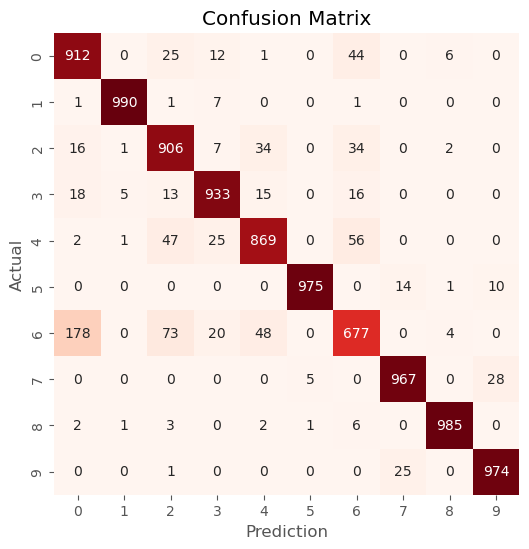

In [35]:
cm = confusion_matrix(y_test, y_predict1)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

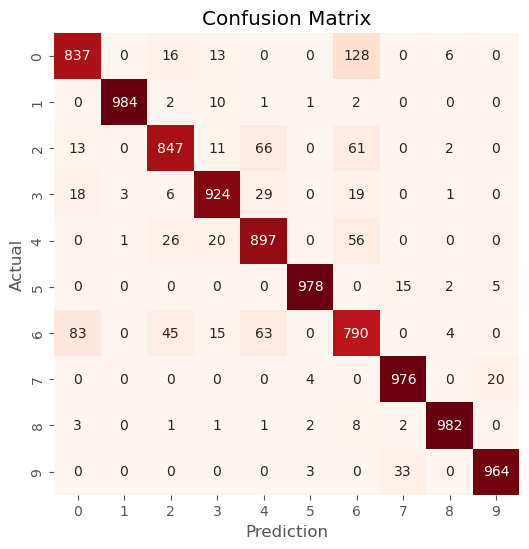

In [36]:
cm = confusion_matrix(y_test, y_predict2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()